# Machine Learning Part 2

We are using the general outline of the machine learning pipeline to structure our project:

1. Data cleaning and formatting
2. Exploratory data analysis
3. Feature engineering and selection\
__4. Compare several machine learning models on a performance metric__

The first notebook covered steps 1-3, and in this notebook
now we get to part 4


You have to;
1. rescale the data if necessary
2. use different models, SVM, Linear, Randomforest Regression
3. hyperparameter tuning
4. evaluate and compare models using the right metrics using plots

Your best model should reach at least the MSE of 10.5

Feel free to use any other model to compare base models with them.\
In fact finding and tuning any model (in Sklearn, or your own implementation) to perform better has `extra points`! (up to 20% of two parts)\
Just remember that you should be able to explain why your model performed better to claim the extra points! \
document your explanation along the answers with name `{Model_name}_stdName.pdf`

Good luck

### Imports 

We will use the standard data science and machine learning libraries in this project. 

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Imputing missing values and scaling values
from sklearn.preprocessing import MinMaxScaler

# Calculate MSE & MAE
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


### Read in Data

First let's read in the formatted data from the previous notebook. 

In [2]:
# Read in data into dataframes 
train_features = pd.read_csv('training_features.csv')
test_features = pd.read_csv('testing_features.csv')
train_labels = pd.read_csv('training_labels.csv')
test_labels = pd.read_csv('testing_labels.csv')

# Display sizes of data
print('Training Feature Size: ', train_features.shape)
print('Testing Feature Size:  ', test_features.shape)
print('Training Labels Size:  ', train_labels.shape)
print('Testing Labels Size:   ', test_labels.shape)

Training Feature Size:  (6622, 104)
Testing Feature Size:   (2839, 104)
Training Labels Size:   (6622, 1)
Testing Labels Size:    (2839, 1)


First we will check if the data has missing values.

In [3]:
np.sum(np.isnan(train_features))

Order                                                             0
Property Id                                                       0
DOF Gross Floor Area                                             32
Year Built                                                        0
Number of Buildings - Self-reported                               0
                                                                 ..
Largest Property Use Type_Strip Mall                              0
Largest Property Use Type_Supermarket/Grocery Store               0
Largest Property Use Type_Urgent Care/Clinic/Other Outpatient     0
Largest Property Use Type_Wholesale Club/Supercenter              0
Largest Property Use Type_Worship Facility                        0
Length: 104, dtype: int64

In [4]:
np.sum(np.isnan(test_features))

Order                                                             0
Property Id                                                       0
DOF Gross Floor Area                                             16
Year Built                                                        0
Number of Buildings - Self-reported                               0
                                                                 ..
Largest Property Use Type_Strip Mall                              0
Largest Property Use Type_Supermarket/Grocery Store               0
Largest Property Use Type_Urgent Care/Clinic/Other Outpatient     0
Largest Property Use Type_Wholesale Club/Supercenter              0
Largest Property Use Type_Worship Facility                        0
Length: 104, dtype: int64

As we can see, there are missing values so we have to fill them.
I choose median of the column to fill missing values.

We'll create a Scikit-learn Imputer object to fill them.

In [5]:
!pip install impyute
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from impyute.imputation.cs import mice
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# Define the regressor with early stopping
regressor = GradientBoostingRegressor(n_estimators=100, validation_fraction=0.1, 
                                      n_iter_no_change=10, tol=0.01)

# Create the iterative imputer using the regressor
imputer = IterativeImputer(estimator=regressor)

# Train on the training features
imputer.fit(train_features)

# Transform both training data and testing data
X = imputer.transform(train_features)
X_test = imputer.transform(test_features)

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [7]:
np.sum(np.isnan(X))

0

In [8]:
np.sum(np.isnan(X_test))

0

### Now we don't have missing values any more!

## Scaling Features

In [9]:
# Create the scaler object with a range of 0-1
# scaler = MinMaxScaler(feature_range=(0, 1))
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
# Fit on the training data
scaler.fit(X)

# Transform both the training and testing data
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [10]:
# Convert y to one-dimensional array (vector)
y = np.array(train_labels).reshape((-1, ))
y_test = np.array(test_labels).reshape((-1, ))

## Machine learning models

#### __SVM Regression__

In [11]:
# Initialize the SVR model
svm = SVR(kernel='rbf')

# Train the model
svm.fit(X, y)

# Make predictions
svm_pred = svm.predict(X_test)

# Calculate MSE
svm_mse = mse(y_test, svm_pred)
print('SVM MSE = %0.4f' % svm_mse)

# Calculate MAE
svm_mae = mae(y_test, svm_pred)
print('SVM MAE = %0.4f' % svm_mae)


SVM MSE = 345.4343
SVM MAE = 14.8079


#### __Linear Regression__

In [12]:
# Initialize the Lr model
lr = LinearRegression()

# Train the model
lr.fit(X,y)

# Make predictions
lr_pred = lr.predict(X_test)

# Calculate MSE
lr_mse = mse(y_test, lr_pred)
print('Lr MSE = %0.4f' % lr_mse)

# Calculate MAE
lr_mae = mae(y_test, lr_pred)
print('Lr MAE = %0.4f' % lr_mae)

Lr MSE = 253.3139
Lr MAE = 12.4225


#### __Random Forest Regression__

In [13]:
# Initialize the RandomForest model
rf = RandomForestRegressor()

# Train the model
rf.fit(X,y)

# Make predictions
rf_pred = rf.predict(X_test)

# Calculate MSE
rf_mse = mse(y_test, rf_pred)
print('RF MSE = %0.4f' % rf_mse)

# Calculate MAE
rf_mae = mae(y_test, rf_pred)
print('RF MAE = %0.4f' % rf_mae)

RF MSE = 166.5427
RF MAE = 9.0124


#### __K-Nearest Neighbors Regression__

In [14]:
# Initialize the KNN model
knn = KNeighborsRegressor(n_neighbors=20)

# Train the model
knn.fit(X,y)

# Make predictions
knn_pred = knn.predict(X_test)

# Calculate MSE
knn_mse = mse(y_test, knn_pred)
print('KNN MSE = %0.4f' % knn_mse)

# Calculate MAE
knn_mae = mae(y_test, knn_pred)
print('KNN MAE = %0.4f' % knn_mae)

KNN MSE = 315.6536
KNN MAE = 13.8288


#### __Gradient Boosting Regression__

In [15]:
# Initialize the Gradient Boosting model
gb = GradientBoostingRegressor()

# Train the model
gb.fit(X,y)

# Make predictions
gb_pred = gb.predict(X_test)

# Calculate MSE
gb_mse = mse(y_test, gb_pred)
print('GB MSE = %0.4f' % gb_mse)

# Calculate MAE
gb_mae = mae(y_test, gb_pred)
print('GB MAE = %0.4f' % gb_mae)

GB MSE = 162.8116
GB MAE = 9.1227


#### __Comparing Models__

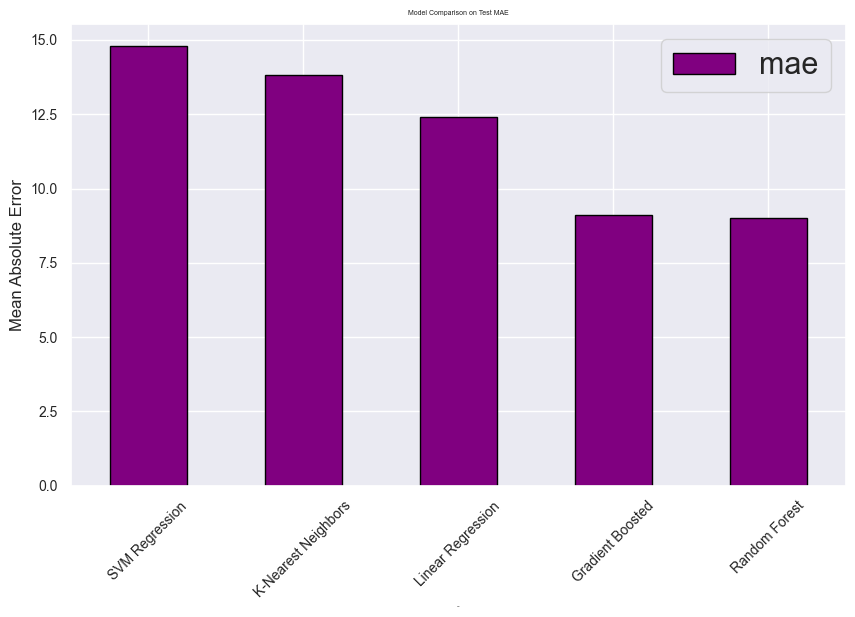

In [16]:
model_comparison = pd.DataFrame({'model': ['SVM Regression', 'Linear Regression', 'Random Forest', 'K-Nearest Neighbors', 'Gradient Boosted'],
                                 'mae': [svm_mae, lr_mae, rf_mae, knn_mae, gb_mae]})

model_comparison.sort_values('mae', ascending=False).plot(x='model', y='mae', kind='bar',
                                                          color='purple', edgecolor='black', figsize=(10, 6))

# Plot formatting
plt.xlabel('Model',size=1)
plt.ylabel('Mean Absolute Error',size=12)
plt.xticks(size=10, rotation=45)
plt.yticks(size=10)
plt.title('Model Comparison on Test MAE', size=5)
plt.show()

__Based on the results, the Random Forest has better performance and the Gradient Boosting Regressor is the second best method.__

## Hyperparameter Tuning

In [17]:
# defining parameter range 
param_grid = {"n_estimators": np.arange(250, 1000),
              "max_depth": np.arange(2, 10),
              "min_samples_leaf": np.arange(2, 10),
              "min_samples_split": np.arange(2, 10)}
  
random_cv = RandomizedSearchCV(RandomForestRegressor(), param_grid,
                               verbose = 3, cv = 3, n_jobs = -1, random_state = 42) 
  
# fitting the model
random_cv.fit(X, y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262,
       263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275,
       276, 277, 2...
       913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925,
       926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938,
       939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951,
       952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964,
       965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977,
       978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990,
       991, 992, 993, 994, 995, 996, 997, 998, 999])},
                   random_state=42, verbose=3)

In [18]:
random_cv.best_estimator_

RandomForestRegressor(max_depth=7, min_samples_leaf=5, min_samples_split=3,
                      n_estimators=678)

In [19]:
random_cv.best_score_

0.801642460447551

In [20]:
random_forest = RandomForestRegressor(**random_cv.best_params_)

# Train the model
random_forest.fit(X,y)

# Make predictions
random_forest_pred = random_forest.predict(X_test)

# Calculate MSE
random_forest_mse = mse(y_test, random_forest_pred)
print('Random Forest MSE = %0.4f' % random_forest_mse)

# Calculate MAE
random_forest_mae = mae(y_test, random_forest_pred)
print('Random Forest MAE = %0.4f' % random_forest_mae)

Random Forest MSE = 173.3847
Random Forest MAE = 9.1594


### After finding the best model from hyperparameter tuning, we will use that to make predictions on the testing set.

In [21]:
# Select the best model
final_model = random_forest

final_model

RandomForestRegressor(max_depth=7, min_samples_leaf=5, min_samples_split=3,
                      n_estimators=678)

In [24]:
final_model.fit(X, y)

final_pred = final_model.predict(X_test)

print('Final model MAE = %0.4f' % mae(y_test, final_pred))

Final model MAE = 9.1601


### Plot the distribution of true values on the test set and the predicted values on the test set

Text(0.5, 1.0, 'Test Values and Predictions')

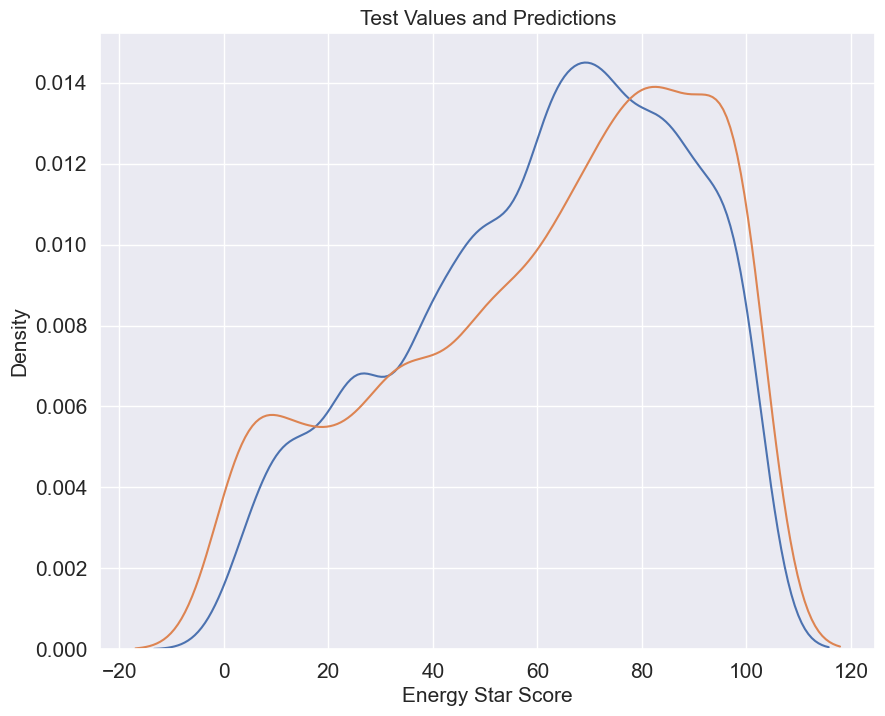

In [23]:
plt.figure(figsize = (10, 8))

# Density plot of the final predictions and the test values
sns.kdeplot(final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

# Label the plot
plt.xlabel('Energy Star Score', size=15)
plt.xticks(size=15)
plt.ylabel('Density', size=15)
plt.yticks(size=15)
plt.title('Test Values and Predictions', size=15)